# Warmup - Final Dense Layer - Model Architectures

```python
model.add(layers.Dense(4, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy)
```

Learning Task     | Use case    | #Neurons/units in the output layer | Activation function in the output layer | Loss function 
--- | --- | --- | --- | --- |
**binary classification** |spam filter| 1 |sigmoid |binary-crossentropy 
**single-label categorical classification** |detect letters  | k | softmax |categorical cross  
**multilabel categorical classification** | predict genres  | k  | sigmoid  | binary-crossentropy 
**regression** | predict age | 1  | none   | MSE

# Transfer Learning

You want to build a house but you have no idea of how to do it!

- How could reading [this](https://www.amazon.com/Handbook-International-Bridge-Engineering-Wai-Fah/dp/143981029X) book help you with solving the task?
![](https://images-na.ssl-images-amazon.com/images/I/51tNBqpWusL._SX334_BO1,204,203,200_.jpg)

## Transfer Learning for Neural Network

![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

> Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis.


In [139]:
import os
import numpy as np
from tensorflow import keras

## Read in data from local drive and define inputs and targets

In [140]:
# define preprocessing object to use to read in data in a format that will work with the pre-trained model we have selected

preprocess = keras.preprocessing.image.ImageDataGenerator(
                                                        preprocessing_function=keras.applications.mobilenet_v2.preprocess_input
                                                        )

In [146]:
# store data in a generator variable called 'data'

data = preprocess.flow_from_directory(
                                    directory='./data',
                                    class_mode='categorical',
                                    classes=os.listdir('./data'),
                                    batch_size=200,
                                    target_size=(224,224)
)

Found 200 images belonging to 4 classes.


In [147]:
# empty data variable contents into xtrain and ytrain

xtrain, ytrain = next(data)

In [148]:
xtrain.shape, ytrain.shape

((200, 224, 224, 3), (200, 4))

In [149]:
ytrain[0]

array([0., 0., 0., 1.], dtype=float32)

## Define pre-trained model and only use the covnet layers for our final model

In [151]:
base_model = keras.applications.mobilenet_v2.MobileNetV2(
                                                    weights='imagenet', # use imagnet weights
                                                    pooling='avg', # to flatten after covnet layers
                                                    include_top=False, # only want the base of the model
                                                    input_shape=(224,224,3),
                                                    alpha=0.35 # the amount of filters from original network, here we only use 35%
                                                    
)

In [152]:
# freeze base model to use the pre-trained imagenet weights!

base_model.trainable=False

In [153]:
base_model.summary()

Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 16) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [154]:
## add dense layers to our base to do the categoric predictions based on our data

model=keras.Sequential()
model.add(base_model)
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_0.35_224 (Functi (None, 1280)              410208    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               128100    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 404       
Total params: 538,712
Trainable params: 128,504
Non-trainable params: 410,208
_________________________________________________________________


In [155]:
# define optimizer, loss func and metric and compile 

model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.categorical_crossentropy,
             metrics=[keras.metrics.categorical_accuracy]
             )

In [156]:
# Stop when the val_loss has increased twice

callback=keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [157]:
#train model

results = model.fit(xtrain, ytrain,
                   epochs=30,
                    verbose=2,
                    batch_size=150,
                    callbacks=[callback],
                    validation_split=0.3
                   )

Epoch 1/30
1/1 - 4s - loss: 2.0203 - categorical_accuracy: 0.1857 - val_loss: 1.0769 - val_categorical_accuracy: 0.6333
Epoch 2/30
1/1 - 1s - loss: 1.2663 - categorical_accuracy: 0.4571 - val_loss: 0.7343 - val_categorical_accuracy: 0.7333
Epoch 3/30
1/1 - 1s - loss: 0.9071 - categorical_accuracy: 0.5714 - val_loss: 0.5049 - val_categorical_accuracy: 0.8833
Epoch 4/30
1/1 - 1s - loss: 0.6214 - categorical_accuracy: 0.7571 - val_loss: 0.3541 - val_categorical_accuracy: 0.9833
Epoch 5/30
1/1 - 1s - loss: 0.3949 - categorical_accuracy: 0.9214 - val_loss: 0.2566 - val_categorical_accuracy: 0.9833
Epoch 6/30
1/1 - 1s - loss: 0.3212 - categorical_accuracy: 0.9143 - val_loss: 0.1941 - val_categorical_accuracy: 0.9833
Epoch 7/30
1/1 - 1s - loss: 0.2478 - categorical_accuracy: 0.9214 - val_loss: 0.1533 - val_categorical_accuracy: 0.9833
Epoch 8/30
1/1 - 1s - loss: 0.2097 - categorical_accuracy: 0.9500 - val_loss: 0.1228 - val_categorical_accuracy: 0.9833
Epoch 9/30
1/1 - 1s - loss: 0.1643 - cat

In [158]:
# Let's test the model with an out of sample picture
# do all preprocessing to pic that was done to the imagenet data set!!!

In [159]:
pic = keras.preprocessing.image.load_img('./test_2.jpg', target_size=(224,224))

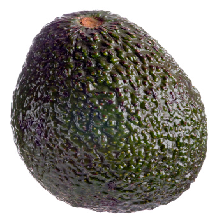

In [160]:
pic

In [161]:
pic_array = keras.preprocessing.image.img_to_array(pic)

In [162]:
pic_array.shape

(224, 224, 3)

In [163]:
# data must be fed into network like the training data so a so-called 'batch dimension' is needed

pic_batch = np.expand_dims(pic_array, axis=0) # np.reshape(1,224,224,3)
pic_batch.shape

(1, 224, 224, 3)

In [164]:
# apply mobilenet's preprocessing which is normalization

pic_processed= keras.applications.mobilenet_v2.preprocess_input(pic_batch)
pic_processed.shape

(1, 224, 224, 3)

In [165]:
# make predictions
model.predict(pic_processed)

array([[0.00296858, 0.98399043, 0.00587643, 0.00716462]], dtype=float32)

In [166]:
# see the class labels

data.class_indices.keys()

dict_keys(['apple', 'avocado', 'cactus', 'orange'])

In [172]:
# save model
model.save('model_1.h5')

In [171]:
# load in model for use
model=keras.models.load_model('model_1.h5')

In [169]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_0.35_224 (Functi (None, 1280)              410208    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               128100    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 404       
Total params: 538,712
Trainable params: 128,504
Non-trainable params: 410,208
_________________________________________________________________


## How to continue?

- Apply this to your data set and tweak to improve

## Advanced - Bonus - only if you have time!!!

### Data augmentation with ImageDataGenerator

- Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better

- See the commented out code above as starting point and make your own dataset which can be augmented if needed

In [79]:
from keras.preprocessing.image import ImageDataGenerator

In [80]:
# define an image data generator
data_gen = keras.preprocessing.image.ImageDataGenerator(
    # define the preprocessing function that should be applied to all images
    preprocessing_function=keras.applications.mobilenet_v2.preprocess_input,
    fill_mode='nearest',
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, 
    zoom_range=0.2,
    shear_range=0.2    
)
    

### Advanced Optional Step: Fine Tuning

This is done after the initial training! Adapt a few of the base layers to the specific learning task by retraining the model. This can improve accuracy, especially if the original learning task of the pre-trained model differs a lot from the actual task.

1. Unfreeze some (or all) of the layers in the convolutional base (starting with the base output layer)
2. Recompile your model and choose a very low learning rate (`1e-5`)
2. Continue training the model but stop early to avoid overfitting